# Question 1

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def calculate_bivariate_normal_probabilities(mu_x, mu_y, var_x, var_y, corrcoef, y_lower=3, y_upper=8, x_value=7, x_lower=-3, x_upper=3, y_value=-4):
    stddev_x = np.sqrt(var_x)
    stddev_y = np.sqrt(var_y)

    # Covariance matrix
    cov_xy = corrcoef * stddev_x * stddev_y
    cov_matrix = np.array([[var_x, cov_xy],
                           [cov_xy, var_y]])


    # Part (a) P(y_lower < Y < y_upper)
    prob_a = stats.norm.cdf(y_upper, mu_y, stddev_y) - stats.norm.cdf(y_lower, mu_y, stddev_y)


    # Part (b) P(y_lower < Y < y_upper | X = x_value)
    cond_mean_y_given_x = mu_y + (cov_xy / var_x) * (x_value - mu_x)
    cond_var_y_given_x = var_y - (cov_xy**2 / var_x)
    cond_std_y_given_x = np.sqrt(cond_var_y_given_x)

    prob_b = stats.norm.cdf(y_upper, cond_mean_y_given_x, cond_std_y_given_x) - \
             stats.norm.cdf(y_lower, cond_mean_y_given_x, cond_std_y_given_x)

    # (c) P(x_lower < X < x_upper)
    prob_c = stats.norm.cdf(x_upper, mu_x, stddev_x) - stats.norm.cdf(x_lower, mu_x, stddev_x)

    # (d) P(x_lower < X < x_upper | Y = y_value)
    cond_mean_x_given_y = mu_x + (cov_xy / var_y) * (y_value - mu_y)
    cond_var_x_given_y = var_x - (cov_xy**2 / var_y)
    cond_std_x_given_y = np.sqrt(cond_var_x_given_y)

    prob_d = stats.norm.cdf(x_upper, cond_mean_x_given_y, cond_std_x_given_y) - \
             stats.norm.cdf(x_lower, cond_mean_x_given_y, cond_std_x_given_y)

    visualize(mu_x, mu_y, stddev_x, stddev_y, corrcoef, x_lower, x_upper, y_lower, y_upper, x_value, y_value)

    return {
        f"P({y_lower} < Y < {y_upper})": prob_a,
        f"P({y_lower} < Y < {y_upper} | X = {x_value})": prob_b,
        f"P({x_lower} < X < {x_upper})": prob_c,
        f"P({x_lower} < X < {x_upper} | Y = {y_value})": prob_d
    }

In [22]:
def visualize(mu_x, mu_y, var_x, var_y, corrcoef, x_lower, x_upper, y_lower, y_upper, x_value, y_value):
    x = np.linspace(mu_x - 3*var_x, mu_x + 3*var_x, 100)
    y = np.linspace(mu_y - 3*var_y, mu_y + 3*var_y, 100)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            Z[j, i] = stats.multivariate_normal.pdf(
                [X[j, i], Y[j, i]],
                mean=[mu_x, mu_y],
                cov=[[var_x**2, corrcoef*var_x*var_y],
                     [corrcoef*var_x*var_y, var_y**2]])

    fig, ax = plt.subplots(figsize=(10, 8))

    contour = ax.contourf(X, Y, Z, cmap='Blues', alpha=0.7)

    plt.colorbar(contour, ax=ax, label='Probability Density')

    ax.axhspan(y_lower, y_upper, alpha=0.2, color='green', label=f'{y_lower} < Y < {y_upper}')
    ax.axvspan(x_lower, x_upper, alpha=0.2, color='red', label=f'{x_lower} < X < {x_upper}')

    ax.axvline(x=x_value, color='purple', linestyle='--', label=f'X = {x_value}')
    ax.axhline(y=y_value, color='orange', linestyle='--', label=f'Y = {y_value}')

    ax.plot(mu_x, mu_y, 'ro', markersize=10, label='Mean')

    def plot_ellipse(ax, mu_x, mu_y, var_x, var_y, corrcoef, color='blue', alpha=0.5, n_std=1.0):
        cov = [[var_x**2, corrcoef*var_x*var_y],
               [corrcoef*var_x*var_y, var_y**2]]
        pearson = cov[0][1]/np.sqrt(cov[0][0] * cov[1][1])

        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                          facecolor=color, alpha=alpha)

        scale_x = np.sqrt(cov[0][0]) * n_std
        scale_y = np.sqrt(cov[1][1]) * n_std

        transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale_x, scale_y) \
            .translate(mu_x, mu_y)

        ellipse.set_transform(transf + ax.transData)
        return ax.add_patch(ellipse)

    plot_ellipse(ax, mu_x, mu_y, var_x, var_y, corrcoef, color='blue', alpha=0.1, n_std=1)
    plot_ellipse(ax, mu_x, mu_y, var_x, var_y, corrcoef, color='blue', alpha=0.05, n_std=2)
    plot_ellipse(ax, mu_x, mu_y, var_x, var_y, corrcoef, color='blue', alpha=0.02, n_std=3)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Bivariate Normal Distribution')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

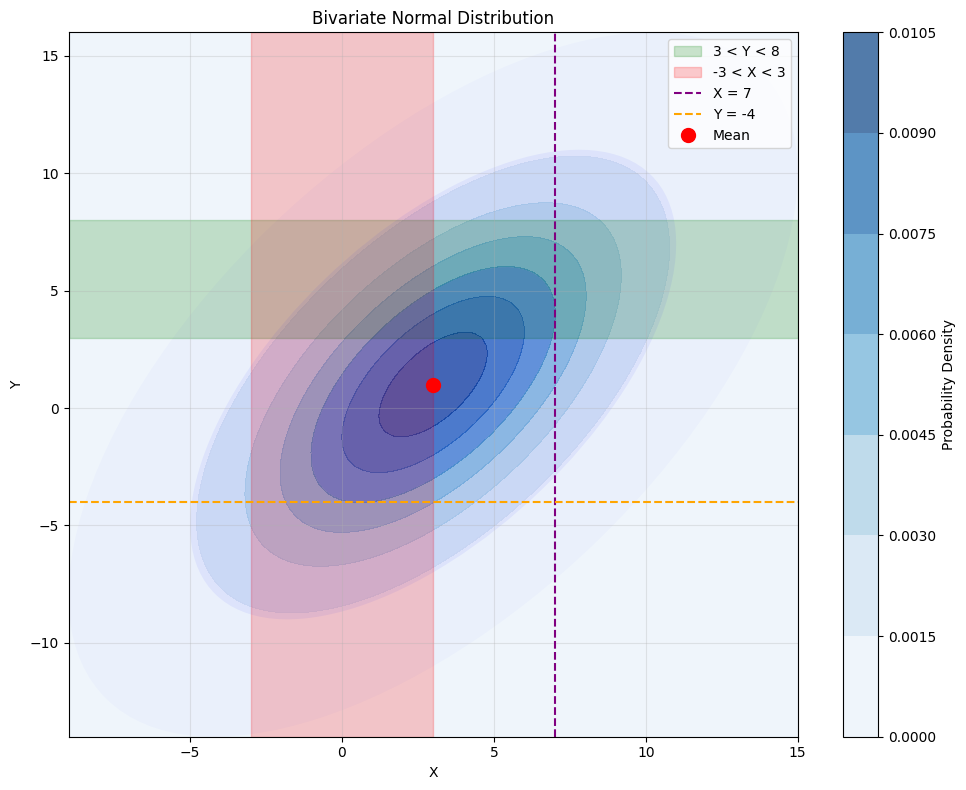

P(3 < Y < 8) = 0.263822
P(3 < Y < 8 | X = 7) = 0.440051
P(-3 < X < 3) = 0.433193
P(-3 < X < 3 | Y = -4) = 0.643078


In [23]:
mu_x = 3
mu_y = 1
sigma_x_sq = 16
sigma_y_sq = 25
rho_xy = 3/5

results = calculate_bivariate_normal_probabilities(mu_x, mu_y, sigma_x_sq, sigma_y_sq, rho_xy)

for key, value in results.items():
    print(f"{key} = {value:.6f}")

# Question 2

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

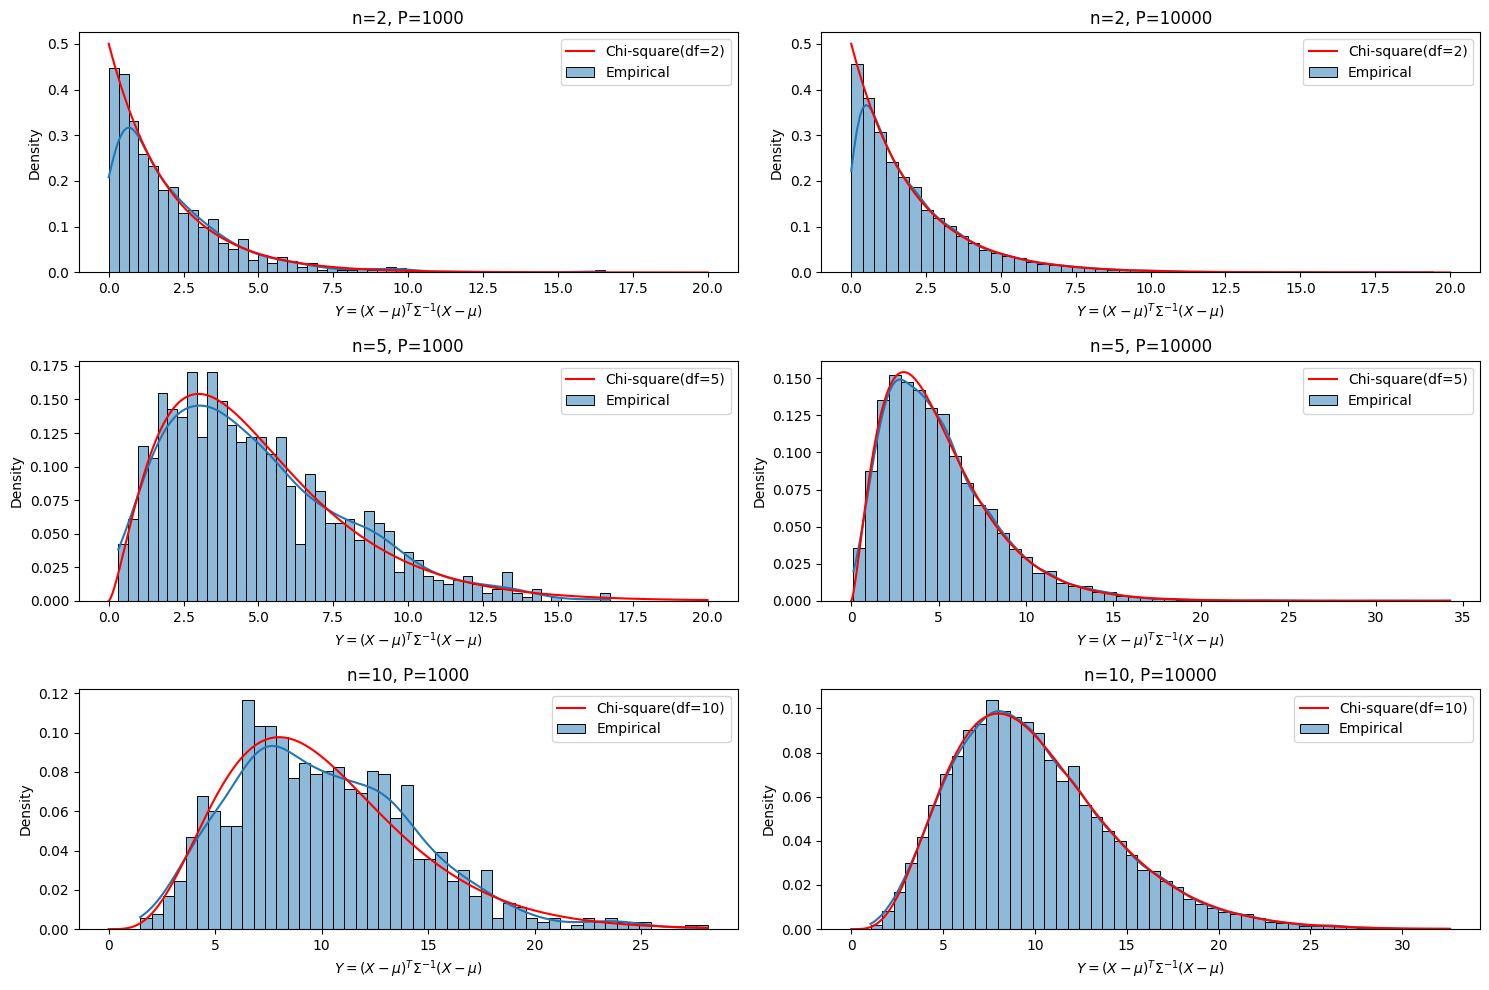

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis

# Part (a) and (b): Generate samples and observe distribution
n_values = [2, 5, 10]
P_values = [1000, 10000]
fig, axes = plt.subplots(len(n_values), len(P_values), figsize=(15, 10))

for i, n in enumerate(n_values):
    for j, P in enumerate(P_values):
        mu = np.zeros(n)
        Sigma = np.identity(n)

        X = np.random.multivariate_normal(mu, Sigma, size=P)

        inv_Sigma = np.linalg.inv(Sigma)
        Y = np.array([(x - mu).T @ inv_Sigma @ (x - mu) for x in X])

        ax = axes[i, j]
        sns.histplot(Y, bins=50, kde=True, ax=ax, stat="density", label="Empirical")

        x_range = np.linspace(0, max(20, np.max(Y)), 1000)
        chi2_pdf = chi2.pdf(x_range, df=n)
        ax.plot(x_range, chi2_pdf, 'r-', label=f'Chi-square(df={n})')

        ax.set_title(f'n={n}, P={P}')
        ax.set_xlabel(r'$Y = (X - \mu)^T \Sigma^{-1} (X - \mu)$')
        ax.set_ylabel('Density')
        ax.legend()

plt.tight_layout()
plt.show()


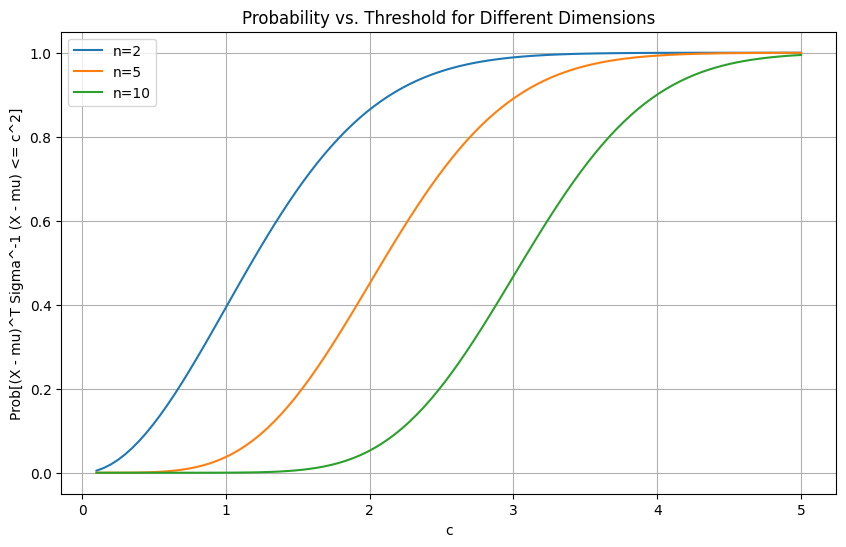

Prob[(X - mu)^T Sigma^-1 (X - mu) <= 2^2] for n=5 = 0.450584


In [26]:
# Part (c): Compute the probability for different values of c
c_range = np.linspace(0.1, 5, 100)
plt.figure(figsize=(10, 6))

for n in n_values:
    probs = [chi2.cdf(c**2, df=n) for c in c_range]
    plt.plot(c_range, probs, label='n={}'.format(n))

plt.xlabel('c')
plt.ylabel('Prob[(X - mu)^T Sigma^-1 (X - mu) <= c^2]')
plt.title('Probability vs. Threshold for Different Dimensions')
plt.grid(True)
plt.legend()
plt.show()

n = 5
c = 2
prob = chi2.cdf(c**2, df=n)
print(f"Prob[(X - mu)^T Sigma^-1 (X - mu) <= {c}^2] for n={n} = {prob:.6f}")

# Question 3

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import requests
from io import StringIO

def load_data_from_url(url):
    response = requests.get(url)
    response.raise_for_status()
    data_str = StringIO(response.text)
    data_list = [i.split(' ')[1:] for i in data_str.read().split('\n')][1:-1]
    data = np.array(data_list, dtype=float)
    return data

def bayes_classifier(x, mu1, mu2, Sigma1, Sigma2, prior1=0.5, prior2=0.5):
    # Convert inputs to numpy arrays
    x = np.array(x).reshape(-1)
    mu1 = np.array(mu1).reshape(-1)
    mu2 = np.array(mu2).reshape(-1)
    Sigma1 = np.array(Sigma1)
    Sigma2 = np.array(Sigma2)

    # Compute likelihoods
    likelihood1 = stats.multivariate_normal.pdf(x, mean=mu1, cov=Sigma1)
    likelihood2 = stats.multivariate_normal.pdf(x, mean=mu2, cov=Sigma2)

    # Compute posterior probabilities using Bayes' theorem
    posterior1 = (likelihood1 * prior1) / (likelihood1 * prior1 + likelihood2 * prior2)
    posterior2 = 1 - posterior1

    # Classify based on posterior probabilities
    predicted_class = 1 if posterior1 > posterior2 else 2

    return predicted_class, posterior1


In [28]:
def visualize_classification(data, predictions, mu1, mu2, Sigma1, Sigma2, posteriors=None):
    plt.figure(figsize=(12, 10))

    if posteriors is not None:
        sc = plt.scatter(data[:, 0], data[:, 1], c=posteriors, cmap='coolwarm',
                     vmin=0, vmax=1, alpha=0.7, edgecolors='k', s=80)
        plt.colorbar(sc, label='Posterior Probability of Class 1')
    else:
        colors = np.array(['red', 'blue'])[predictions-1]
        plt.scatter(data[:, 0], data[:, 1], c=colors, alpha=0.7, edgecolors='k', s=80)

    plt.scatter(mu1[0], mu1[1], c='blue', marker='X', s=200, label='Class 1 Mean')
    plt.scatter(mu2[0], mu2[1], c='red', marker='X', s=200, label='Class 2 Mean')

    def visualize_ellipse(ax, mu, Sigma, color, n_std=2, label=None):
        pearson = Sigma[0, 1]/np.sqrt(Sigma[0, 0] * Sigma[1, 1])

        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                          facecolor=color, alpha=0.2, label=label)
        scale_x = np.sqrt(Sigma[0, 0]) * n_std
        scale_y = np.sqrt(Sigma[1, 1]) * n_std

        transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale_x, scale_y) \
            .translate(mu[0], mu[1])

        ellipse.set_transform(transf + ax.transData)
        return ax.add_patch(ellipse)

    visualize_ellipse(plt.gca(), mu1, Sigma1, 'blue', label='Class 1 Distribution')
    visualize_ellipse(plt.gca(), mu2, Sigma2, 'red', label='Class 2 Distribution')

    x_min, x_max = min(data[:, 0].min() - 1, mu1[0] - 4, mu2[0] - 4), max(data[:, 0].max() + 1, mu1[0] + 4, mu2[0] + 4)
    y_min, y_max = min(data[:, 1].min() - 1, mu1[1] - 4, mu2[1] - 4), max(data[:, 1].max() + 1, mu1[1] + 4, mu2[1] + 4)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    grid_predictions = np.array([bayes_classifier(point, mu1, mu2, Sigma1, Sigma2)[0] for point in grid_points])

    grid_predictions = grid_predictions.reshape(xx.shape)

    plt.contour(xx, yy, grid_predictions, levels=[1.5], colors='k', linestyles='--', linewidths=2,
               label='Decision Boundary')

    grid_posteriors = np.array([bayes_classifier(point, mu1, mu2, Sigma1, Sigma2)[1] for point in grid_points])
    grid_posteriors = grid_posteriors.reshape(xx.shape)
    contour_levels = np.linspace(0, 1, 11)
    CS = plt.contourf(xx, yy, grid_posteriors, levels=contour_levels, cmap='coolwarm', alpha=0.3)

    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title('Bayes Classification Results', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    if posteriors is not None:
        n_class1 = np.sum(predictions == 1)
        n_class2 = np.sum(predictions == 2)

        plt.text(0.02, 0.02, f"Class 1: {n_class1} points\nClass 2: {n_class2} points",
                transform=plt.gca().transAxes, fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

[[-9.03171877  5.96467616]
 [-5.37442493 -8.43756258]
 [-0.27802078 -3.17694446]
 ...
 [-0.33018694  5.99215469]
 [ 5.90624535 -7.33817412]
 [ 0.65612901 -7.31437397]]
Number of points classified as Class 1: 398
Number of points classified as Class 2: 602

Mahalanobis Distance Statistics:
Class 1 - Mean: 7.4440, Min: 0.2176, Max: 15.0995
Class 2 - Mean: 7.3530, Min: 0.4174, Max: 17.1223


<ipython-input-19-45a2a76090a4>:45: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, grid_predictions, levels=[1.5], colors='k', linestyles='--', linewidths=2,


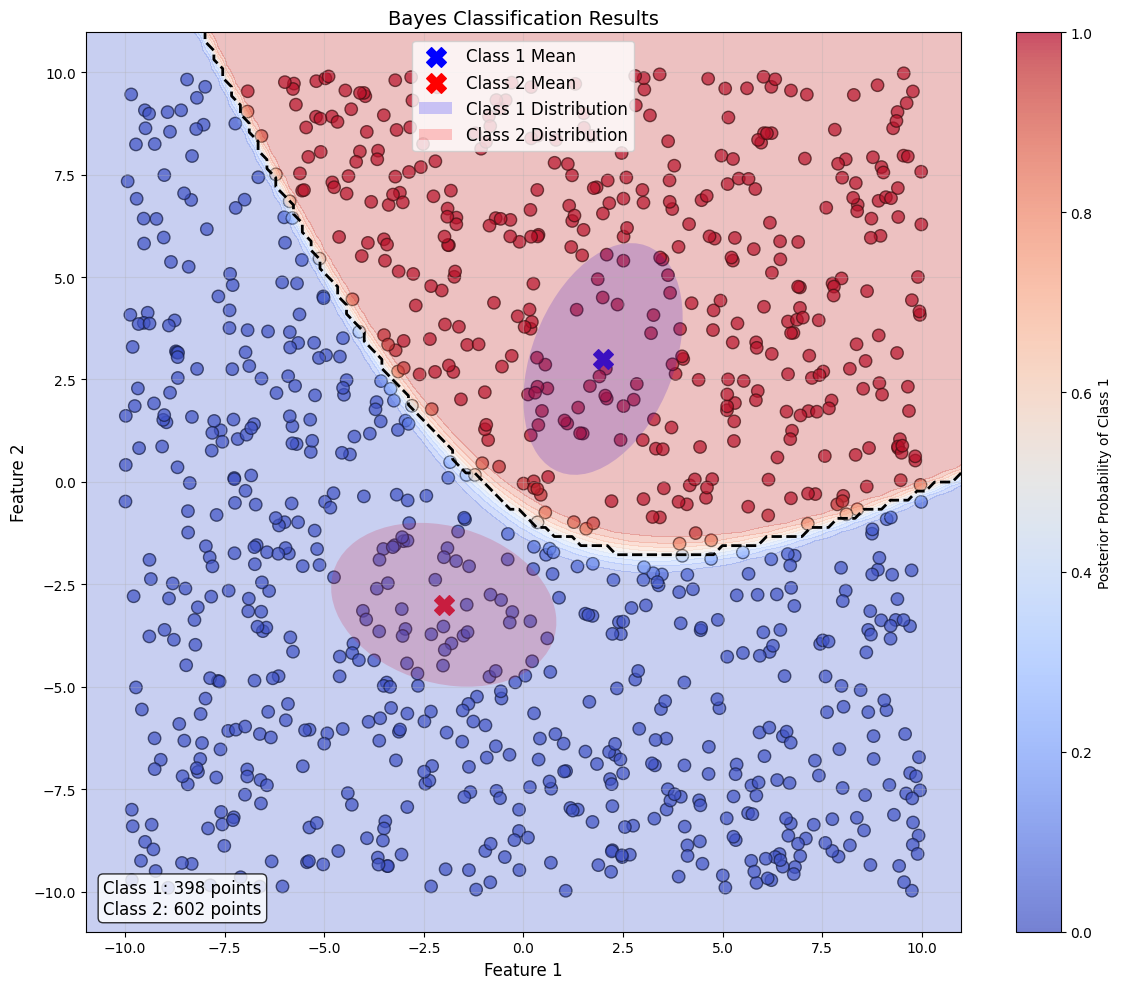


Classification Results (First 5 rows):
   Feature1  Feature2  Predicted_Class  Class1_Posterior  Class2_Posterior  \
0 -9.031719  5.964676                2      1.833140e-16          1.000000   
1 -5.374425 -8.437563                2      1.061006e-10          1.000000   
2 -0.278021 -3.176944                2      1.164620e-04          0.999884   
3  8.901727 -2.144719                2      6.632980e-06          0.999993   
4 -9.831245 -9.723812                2      5.195186e-16          1.000000   

   Mahalanobis_Dist_Class1  Mahalanobis_Dist_Class2  
0                12.759141                 9.499343  
1                 9.418422                 6.533446  
2                 4.437644                 1.220466  
3                 9.479097                 8.119045  
4                12.902127                 9.797456  


In [20]:
mu1 = np.array([2, 3])
mu2 = np.array([-2, -3])
Sigma1 = np.array([[1, 0.5], [0.5, 2]])
Sigma2 = np.array([[2, -0.3], [-0.3, 1]])

url = 'https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL253/assignment_5/File_Datapoints.txt'
data = load_data_from_url(url)
print(data)

results = [bayes_classifier(x, mu1, mu2, Sigma1, Sigma2) for x in data]
predictions = np.array([res[0] for res in results])
posteriors = np.array([res[1] for res in results])

n_class1 = np.sum(predictions == 1)
n_class2 = np.sum(predictions == 2)

print(f"Number of points classified as Class 1: {n_class1}")
print(f"Number of points classified as Class 2: {n_class2}")

def mahalanobis_distance(x, mu, Sigma):
    x_minus_mu = x - mu
    inv_Sigma = np.linalg.inv(Sigma)
    return np.sqrt(np.dot(np.dot(x_minus_mu.T, inv_Sigma), x_minus_mu))

distances_class1 = np.array([mahalanobis_distance(x, mu1, Sigma1) for x in data])
distances_class2 = np.array([mahalanobis_distance(x, mu2, Sigma2) for x in data])

print("\nMahalanobis Distance Statistics:")
print(f"Class 1 - Mean: {distances_class1.mean():.4f}, Min: {distances_class1.min():.4f}, Max: {distances_class1.max():.4f}")
print(f"Class 2 - Mean: {distances_class2.mean():.4f}, Min: {distances_class2.min():.4f}, Max: {distances_class2.max():.4f}")

visualize_classification(data, predictions, mu1, mu2, Sigma1, Sigma2, posteriors)

results_df = pd.DataFrame({
    'Feature1': data[:, 0],
    'Feature2': data[:, 1],
    'Predicted_Class': predictions,
    'Class1_Posterior': posteriors,
    'Class2_Posterior': 1 - posteriors,
    'Mahalanobis_Dist_Class1': distances_class1,
    'Mahalanobis_Dist_Class2': distances_class2
})

print("\nClassification Results (First 5 rows):")
print(results_df.head())
